In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Análise inicial do dataset

In [4]:
train_data = pd.read_csv('../data/train.csv')

print("Informações do Dataset:")
display(train_data.info())

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [5]:
print("\nEstatísticas Descritivas:")
display(train_data.describe())


Estatísticas Descritivas:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print("\nValores Ausentes:")
display(train_data.isnull().sum())


Valores Ausentes:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Tratamento de valores ausentes

#### Note que existem 687 valores ausentes na coluna 'Cabin', isso representa 77% das linhas dos dados. Ou seja, temos decidir se vamos excluir essa coluna, preencher valores ausentes (O que para esse tipo de dado, acho que não faz sentido), criar uma nova coluna para representar se o passageiro possui um cabine ou não, ou retirar todas as linhas que possuem valores ausentes (O que remove 77%  das linhas dos dados).

#### Configuração: escolha a opção desejada (1, 2, 3 ou 4)

##### 1 = Excluir a coluna 'Cabin'
##### 2 = Preencher valores ausentes
##### 3 = Criar coluna 'Has_Cabin'
##### 4 = Remover linhas com valores ausentes na coluna 'Cabin'

In [7]:
option = 3

if option == 1:
    data_processed = train_data.drop(columns=['Cabin'])
    print("\nOpção 1: Coluna 'Cabin' foi removida.")

elif option == 2:
    data_processed = train_data.copy()
    data_processed['Cabin'] = data_processed['Cabin'].fillna('Unknown')
    print("\nOpção 2: Valores ausentes preenchidos com 'Unknown'.")

elif option == 3:
    data_processed = train_data.copy()
    data_processed.drop(columns=['Cabin'], inplace=True)
    data_processed['Has_Cabin'] = train_data['Cabin'].notnull().astype(int)
    print("\nOpção 3: Coluna 'Has_Cabin' criada para indicar presença de cabine.")

elif option == 4:
    data_processed = train_data.dropna(subset=['Cabin'])
    print(f"\nOpção 4: Linhas com valores ausentes removidas. Restam {len(data_processed)} linhas.")
    
else:
    print("Opção inválida. Escolha entre 1, 2, 3 ou 4.")
    data_processed = None

print(tabulate(data_processed.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(data_processed.isnull().sum())




Opção 3: Coluna 'Has_Cabin' criada para indicar presença de cabine.
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Embarked   |   Has_Cabin |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+============+=============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |           0 |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Has_Cabin        0
dtype: int64

### A mesma lógica se aplica para as colunas 'Age', que possuem valores ausentes.

#### Configuração: escolha a opção desejada (1, 2, 3 ou 4)
##### 1 = Excluir a coluna 'Age'
##### 2 = Preencher valores ausentes com a mediana
##### 3 = Preencher valores ausentes com a média
##### 4 = Remover linhas com valores ausentes na coluna 'Age'



In [8]:
option_age = 2

if option_age == 1:
    data_age_processed = data_processed.drop(columns=['Age'])
    print("\nOpção 1: Coluna 'Age' foi removida.")

elif option_age == 2:
    data_age_processed = data_processed.copy()
    median_age = data_processed['Age'].median()
    data_age_processed['Age'] = data_age_processed['Age'].fillna(median_age)
    print(f"\nOpção 2: Valores ausentes preenchidos com a mediana ({median_age}).")

elif option_age == 3:
    data_age_processed = data_processed.copy()
    mean_age = data_processed['Age'].mean()
    data_age_processed['Age'] = data_age_processed['Age'].fillna(mean_age)
    print(f"\nOpção 3: Valores ausentes preenchidos com a média ({mean_age:.2f}).")

elif option_age == 4:
    data_age_processed = data_processed.dropna(subset=['Age'])
    print(f"\nOpção 4: Linhas com valores ausentes removidas. Restam {len(data_age_processed)} linhas.")

else:
    print("Opção inválida. Escolha entre 1, 2, 3 ou 4.")
    data_age_processed = None

print(tabulate(data_age_processed.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(data_age_processed.isnull().sum())


Opção 2: Valores ausentes preenchidos com a mediana (28.0).
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Embarked   |   Has_Cabin |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+============+=============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |           0 |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+-------

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Has_Cabin      0
dtype: int64

### Como a coluna 'Embarked' possui apenas 2 valores ausentes, podemos optar por remover as linhas que possuem valores ausentes.

In [9]:
data_embarked_processed = data_age_processed.dropna(subset=['Embarked'])

processed_data = data_embarked_processed

print(tabulate(processed_data.head(), headers='keys', showindex=True, tablefmt='grid'))

print("\nValores ausentes após o tratamento:")
display(processed_data.isnull().sum())


+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Embarked   |   Has_Cabin |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+============+=============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |           0 |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|  1 |             2 |        

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

In [10]:
print("\nInformações do Dataset após o tratamento de valores ausentes:")
display(processed_data.info())


Informações do Dataset após o tratamento de valores ausentes:
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Has_Cabin    889 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


None

In [11]:
print("\nEstatísticas Descritivas após o tratamento de valores ausentes:")
display(processed_data.describe())


Estatísticas Descritivas após o tratamento de valores ausentes:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681,0.227222
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504,0.419273
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# Análise exploratória

## Realizaremos alguns gráficos para entender melhor os dados.

### Definindo o estilo dos gráficos

In [12]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### Plot 1: Contagem de sobreviventes


C:\Users\breno\AppData\Local\Temp\ipykernel_25360\1547743075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=processed_data, x='Survived', palette='Set2')
C:\Users\breno\AppData\Local\Temp\ipykernel_25360\1547743075.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não Sobreviveu', 'Sobreviveu'], fontsize=12)


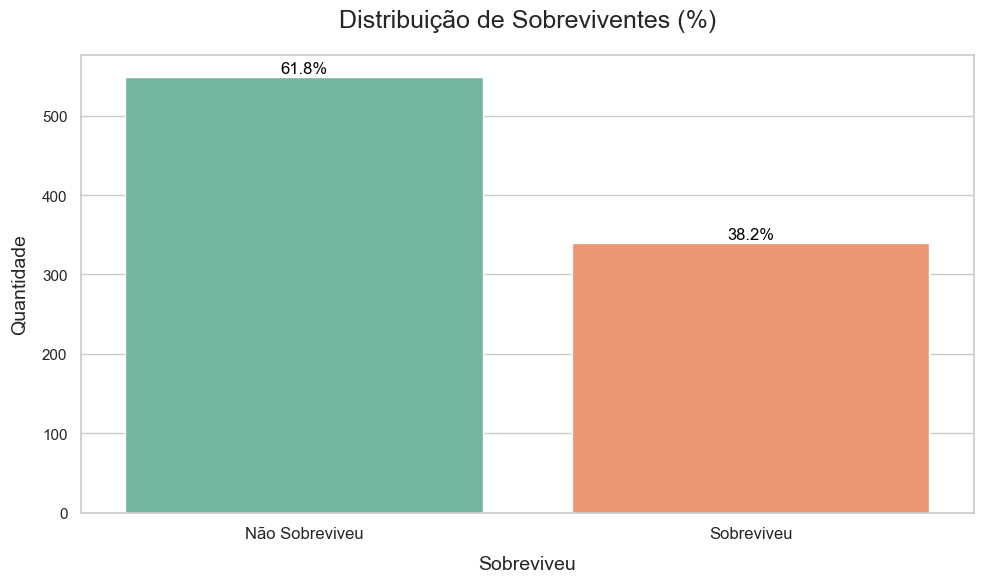

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=processed_data, x='Survived', palette='Set2')
for p in ax.patches:
    percentage = f"{100 * p.get_height() / len(processed_data):.1f}%"
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height() + 10),  
                ha='center', va='center', fontsize=12, color='black')
ax.set_title('Distribuição de Sobreviventes (%)', fontsize=18, pad=20)
ax.set_xlabel('Sobreviveu', fontsize=14, labelpad=10)
ax.set_ylabel('Quantidade', fontsize=14, labelpad=10)
ax.set_xticklabels(['Não Sobreviveu', 'Sobreviveu'], fontsize=12)
plt.tight_layout()
plt.show()


### Plot 2: Idade por Sobrevivência


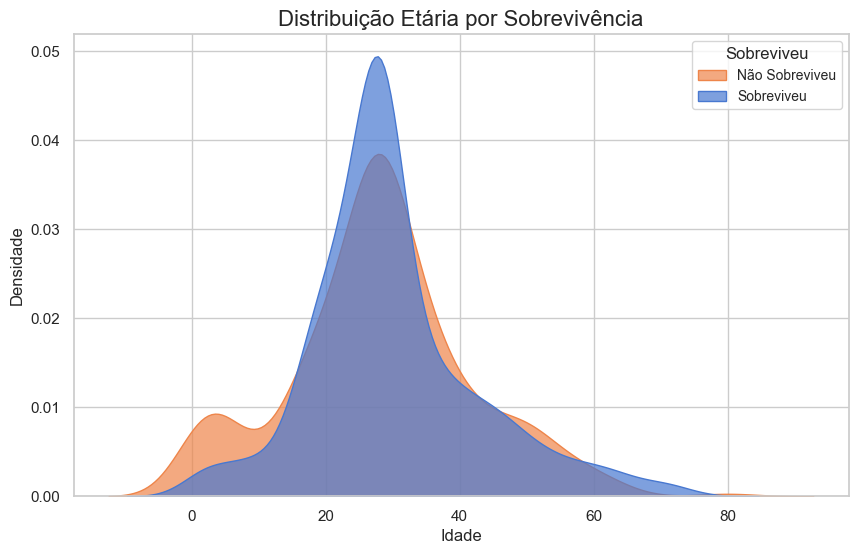

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=processed_data, x='Age', hue='Survived', fill=True, common_norm=False, palette='muted', alpha=0.7)
plt.title('Distribuição Etária por Sobrevivência', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend(title='Sobreviveu', labels=['Não Sobreviveu', 'Sobreviveu'], fontsize=10)
plt.show()


### Plot 3: Sobrevivência por Gênero e Classe

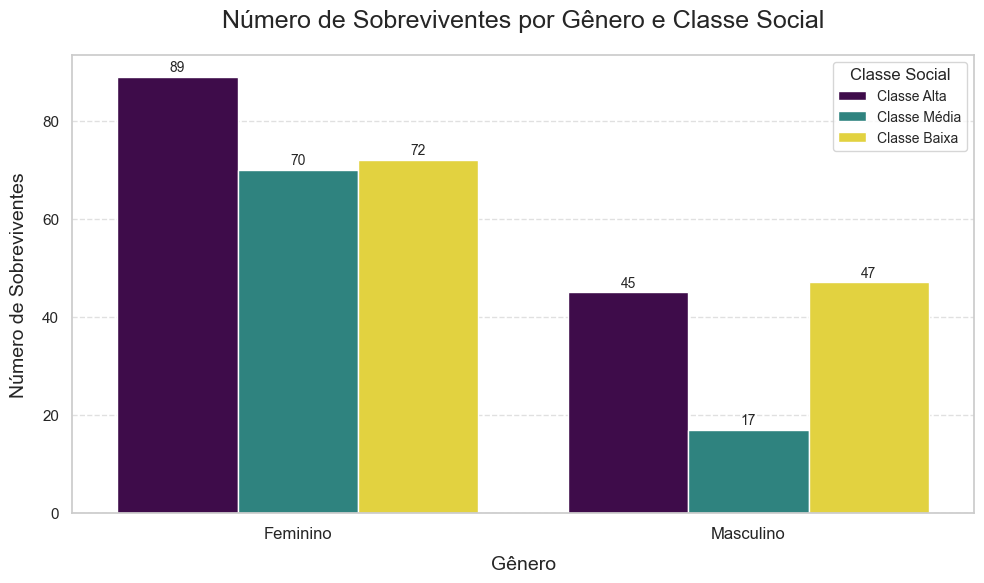

In [15]:
plt.figure(figsize=(10, 6))

survivors_data = processed_data[processed_data['Survived'] == 1].groupby(['Sex', 'Pclass']).size().reset_index(name='Count')

sns.barplot(data=survivors_data, x='Sex', y='Count', hue='Pclass', palette='viridis')

plt.title('Número de Sobreviventes por Gênero e Classe Social', fontsize=18, pad=20)
plt.xlabel('Gênero', fontsize=14, labelpad=10)
plt.ylabel('Número de Sobreviventes', fontsize=14, labelpad=10)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Classe Alta', 'Classe Média', 'Classe Baixa'],
           title='Classe Social', fontsize=10, title_fontsize=12, loc='upper right', frameon=True, shadow=False)

plt.xticks([0, 1], ['Feminino', 'Masculino'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.tight_layout()
plt.show()


### Plot 4: Tarifa paga (Fare) por Sobrevivência

C:\Users\breno\AppData\Local\Temp\ipykernel_25360\1259822493.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=processed_data, x='Survived', y='Fare', palette='coolwarm', bw=0.2, cut=0, scale='width')
C:\Users\breno\AppData\Local\Temp\ipykernel_25360\1259822493.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=processed_data, x='Survived', y='Fare', palette='coolwarm', bw=0.2, cut=0, scale='width')
C:\Users\breno\AppData\Local\Temp\ipykernel_25360\1259822493.py:3: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=processed

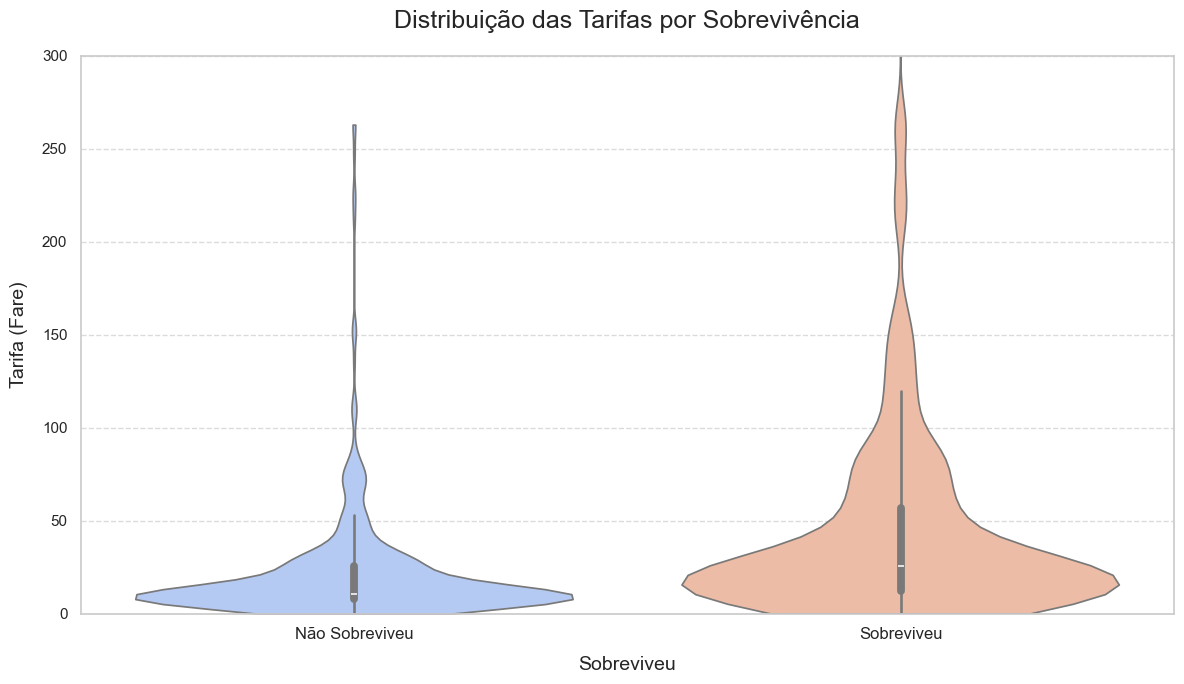

In [16]:
plt.figure(figsize=(12, 7))

sns.violinplot(data=processed_data, x='Survived', y='Fare', palette='coolwarm', bw=0.2, cut=0, scale='width')

plt.title('Distribuição das Tarifas por Sobrevivência', fontsize=18, pad=20)
plt.xlabel('Sobreviveu', fontsize=14, labelpad=10)
plt.ylabel('Tarifa (Fare)', fontsize=14, labelpad=10)
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'], fontsize=12)
plt.ylim(0, 300)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Plot 5: Taxa de sobrevivência por Presença de Cabine

C:\Users\breno\AppData\Local\Temp\ipykernel_25360\52135213.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=processed_data, x='Has_Cabin', y='Survived', palette='Set2', ci=None)
C:\Users\breno\AppData\Local\Temp\ipykernel_25360\52135213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=processed_data, x='Has_Cabin', y='Survived', palette='Set2', ci=None)


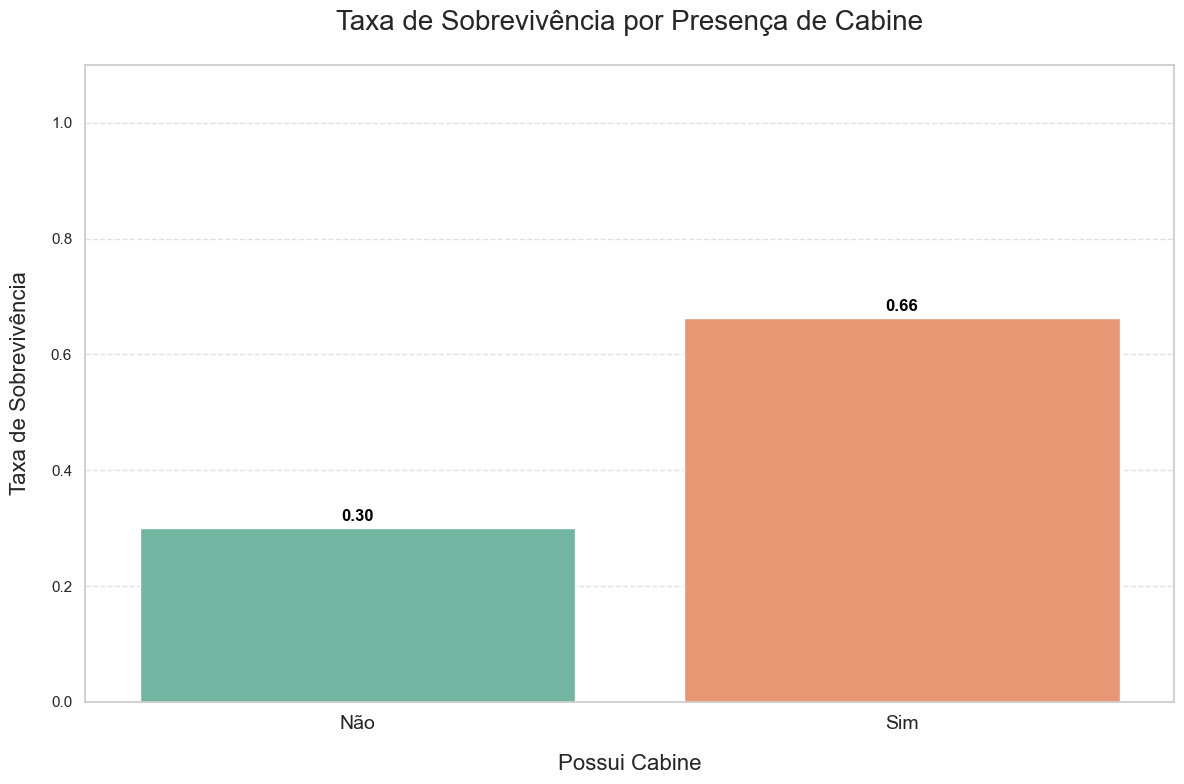

In [17]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=processed_data, x='Has_Cabin', y='Survived', palette='Set2', ci=None)

for p in ax.patches:
    value = f"{p.get_height():.2f}"
    ax.annotate(value,
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.02),
                ha='center', va='center', fontsize=12, color='black', weight='bold')

ax.set_title('Taxa de Sobrevivência por Presença de Cabine', fontsize=20, pad=25)
ax.set_xlabel('Possui Cabine', fontsize=16, labelpad=15)
ax.set_ylabel('Taxa de Sobrevivência', fontsize=16, labelpad=15)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Não', 'Sim'], fontsize=14)

plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Plot 6: Taxa de sobrevivência por Ponto de Embarque e Classe

C:\Users\breno\AppData\Local\Temp\ipykernel_25360\676825102.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=processed_data, x='Embarked', y='Survived', hue='Pclass',


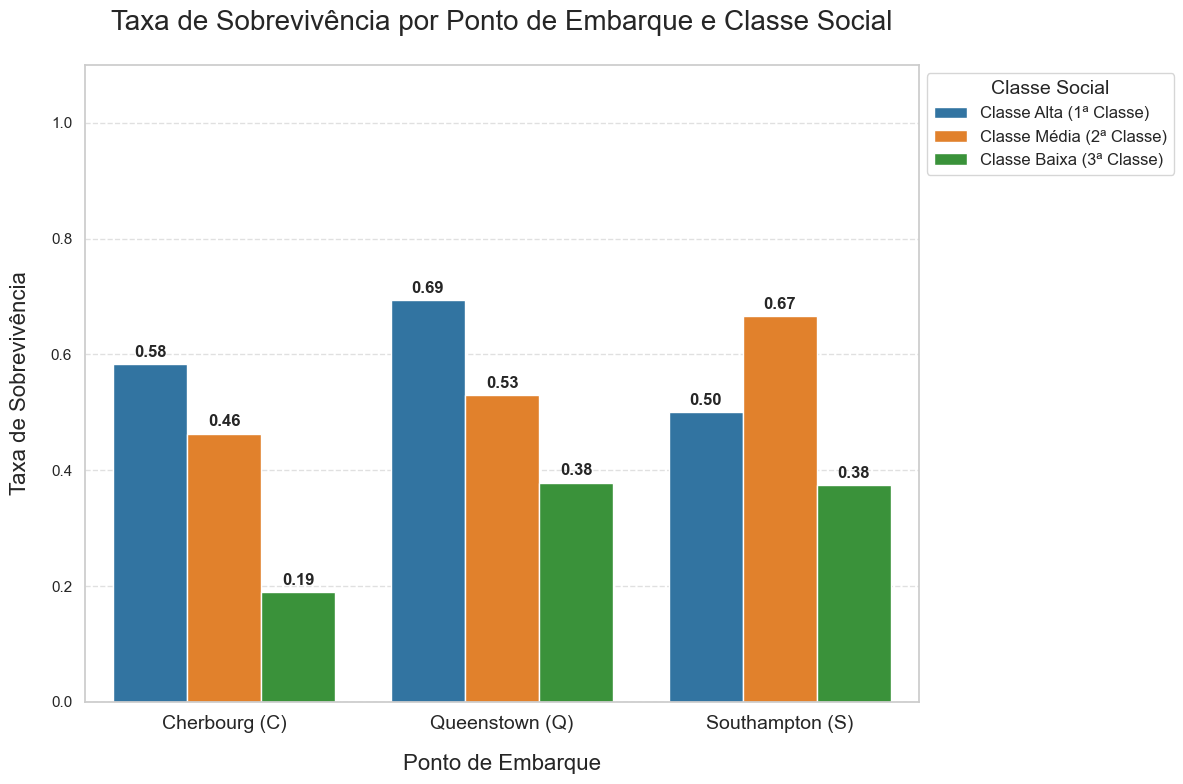

In [18]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=processed_data, x='Embarked', y='Survived', hue='Pclass', 
                 palette=['#1f77b4', '#ff7f0e', '#2ca02c'], ci=None)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=12, padding=3, weight='bold')

ax.set_title('Taxa de Sobrevivência por Ponto de Embarque e Classe Social', fontsize=20, pad=25)
ax.set_xlabel('Ponto de Embarque', fontsize=16, labelpad=15)
ax.set_ylabel('Taxa de Sobrevivência', fontsize=16, labelpad=15)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'], fontsize=14)

plt.legend(title='Classe Social', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1),
           labels=['Classe Alta (1ª Classe)', 'Classe Média (2ª Classe)', 'Classe Baixa (3ª Classe)'])

plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# Aplicando Machine Learning


In [19]:
! pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import numpy as np

from numpy import astype

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Análise dos dados


In [21]:
data = processed_data

print(tabulate(data.head(), headers='keys', showindex=True, tablefmt='grid'))

+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Embarked   |   Has_Cabin |
+====+===============+============+==========+=====================================================+========+=======+=========+=========+==================+=========+============+=============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |           0 |
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+-------------+
|  1 |             2 |        

### Aplicando Encoder para variáveis categóricas

In [22]:

data = processed_data.copy()

le_sex = LabelEncoder()
le_embarked = LabelEncoder()

data['Sex'] = le_sex.fit_transform(data['Sex'])
data['Embarked'] = le_embarked.fit_transform(data['Embarked'])

print("\nDados após encoding:")
print(tabulate(data.head(10), headers='keys', showindex=True, tablefmt='grid'))

sex_mapping = {
    'female': 0,
    'male': 1
}

embarked_mapping = {
    'C': 0,  # Cherbourg
    'Q': 1,  # Queenstown
    'S': 2   # Southampton
}

print("\nMapeamento Sex:", dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_))))
print("Mapeamento Embarked:", dict(zip(le_embarked.classes_, le_embarked.transform(le_embarked.classes_))))



Dados após encoding:
+----+---------------+------------+----------+-----------------------------------------------------+-------+-------+---------+---------+------------------+---------+------------+-------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                |   Sex |   Age |   SibSp |   Parch | Ticket           |    Fare |   Embarked |   Has_Cabin |
+====+===============+============+==========+=====================================================+=======+=======+=========+=========+==================+=========+============+=============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             |     1 |    22 |       1 |       0 | A/5 21171        |  7.25   |          2 |           0 |
+----+---------------+------------+----------+-----------------------------------------------------+-------+-------+---------+---------+------------------+---------+------------+-------------+
|  1 |       

### Aplicando normalização das features

In [23]:
numeric_columns = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()

data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print("\nDados após normalização:")
print(tabulate(data.head(10), headers='keys', showindex=True, tablefmt='grid'))


Dados após normalização:
+----+---------------+------------+----------+-----------------------------------------------------+-------+-----------+-----------+-----------+------------------+------------+------------+-------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                |   Sex |       Age |     SibSp |     Parch | Ticket           |       Fare |   Embarked |   Has_Cabin |
+====+===============+============+==========+=====================================================+=======+===========+===========+===========+==================+============+============+=============+
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             |     1 | -0.563674 |  0.43135  | -0.474326 | A/5 21171        | -0.50024   |          2 |           0 |
+----+---------------+------------+----------+-----------------------------------------------------+-------+-----------+-----------+-----------+--------------

### Dropando colunas que não serão utilizadas

In [24]:
columns_to_drop = ['PassengerId', 'Ticket', 'Name']  
data = data.drop(columns=columns_to_drop)

print("\nColunas mantidas no dataset:")
print(data.columns.tolist())

print(tabulate(data.head(10), headers='keys', showindex=True, tablefmt='grid'))


Colunas mantidas no dataset:
['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Has_Cabin']
+----+------------+----------+-------+-----------+-----------+-----------+------------+------------+-------------+
|    |   Survived |   Pclass |   Sex |       Age |     SibSp |     Parch |       Fare |   Embarked |   Has_Cabin |
+====+============+==========+=======+===========+===========+===========+============+============+=============+
|  0 |          0 |        3 |     1 | -0.563674 |  0.43135  | -0.474326 | -0.50024   |          2 |           0 |
+----+------------+----------+-------+-----------+-----------+-----------+------------+------------+-------------+
|  1 |          1 |        1 |     0 |  0.669217 |  0.43135  | -0.474326 |  0.788947  |          0 |           1 |
+----+------------+----------+-------+-----------+-----------+-----------+------------+------------+-------------+
|  2 |          1 |        3 |     0 | -0.255451 | -0.475199 | -0.474326 | -0

### Separando os dados entre treino, validação e teste

In [25]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_temp, X_test, y_temp, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,    
    random_state=42,    
    stratify=y         
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,   
    random_state=42,
    stratify=y_temp
)

In [26]:
print("\nTamanho dos conjuntos:")
print(tabulate({
    'Conjunto': ['Treino', 'Validação', 'Teste'],
    'Amostras': [X_train.shape[0], X_val.shape[0], X_test.shape[0]],
    'Proporção': [
        f"{X_train.shape[0]/len(X):.1%}",
        f"{X_val.shape[0]/len(X):.1%}", 
        f"{X_test.shape[0]/len(X):.1%}"
    ]
}, headers='keys', tablefmt='grid'))


Tamanho dos conjuntos:
+------------+------------+-------------+
| Conjunto   |   Amostras | Proporção   |
+============+============+=============+
| Treino     |        533 | 60.0%       |
+------------+------------+-------------+
| Validação  |        178 | 20.0%       |
+------------+------------+-------------+
| Teste      |        178 | 20.0%       |
+------------+------------+-------------+


In [27]:
print("\nDistribuição das classes:")
print(tabulate({
    'Conjunto': ['Treino', 'Treino', 'Validação', 'Validação', 'Teste', 'Teste'],
    'Classe': [0, 1, 0, 1, 0, 1],
    'Proporção': [
        y_train.value_counts(normalize=True)[0],
        y_train.value_counts(normalize=True)[1],
        y_val.value_counts(normalize=True)[0], 
        y_val.value_counts(normalize=True)[1],
        y_test.value_counts(normalize=True)[0],
        y_test.value_counts(normalize=True)[1]
    ]
}, headers='keys', tablefmt='grid', floatfmt='.2%'))

print('Note que as proporções foram mantidas')


Distribuição das classes:
+------------+----------+-------------+
| Conjunto   |   Classe |   Proporção |
+============+==========+=============+
| Treino     |        0 |      61.73% |
+------------+----------+-------------+
| Treino     |        1 |      38.27% |
+------------+----------+-------------+
| Validação  |        0 |      61.80% |
+------------+----------+-------------+
| Validação  |        1 |      38.20% |
+------------+----------+-------------+
| Teste      |        0 |      61.80% |
+------------+----------+-------------+
| Teste      |        1 |      38.20% |
+------------+----------+-------------+
Note que as proporções foram mantidas


### Definindo a validação cruzada, oversample, métricas, pipeline para os modelos e grid de parâmetros

Antes do SMOTE:

Distribuição original das classes:
Classe 0: 329 amostras (61.7%)
Classe 1: 204 amostras (38.3%)


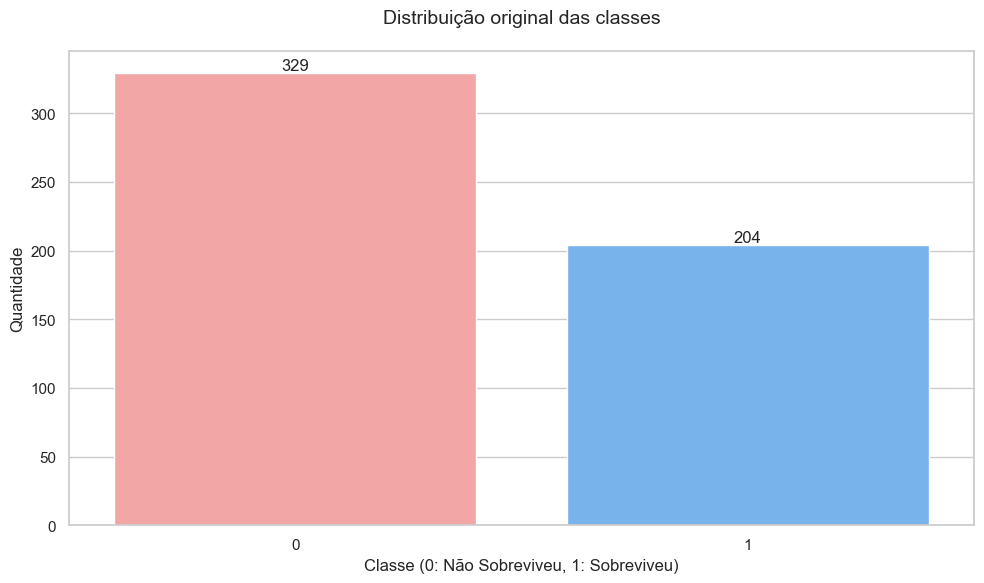


Após SMOTE:

Distribuição das classes após SMOTE:
Classe 0: 329 amostras (50.0%)
Classe 1: 329 amostras (50.0%)


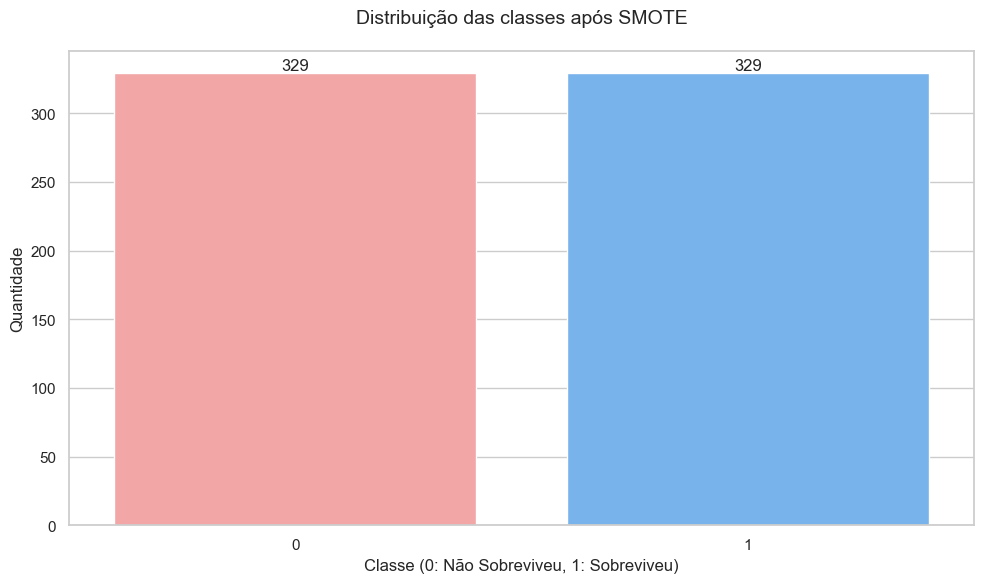

In [28]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('default')  
import seaborn as sns
sns.set_theme(style="whitegrid")  

def check_balance(X, y, title="Distribuição das classes"):
    unique, counts = np.unique(y.astype(int), return_counts=True)
    print(f"\n{title}:")
    for classe, count in zip(unique, counts):
        print(f"Classe {classe}: {count} amostras ({count/len(y):.1%})")

    plt.figure(figsize=(10, 6))
    sns.countplot(data=pd.DataFrame({'Classe': y}), x='Classe', 
                 order=[0, 1],
                 palette=['#ff9999', '#66b3ff'])
    
    plt.title(title, fontsize=14, pad=20)
    plt.xlabel('Classe (0: Não Sobreviveu, 1: Sobreviveu)', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)

    for i, count in enumerate(counts):
        plt.text(i, count, str(count), 
                horizontalalignment='center',
                verticalalignment='bottom')
    
    plt.tight_layout()
    plt.show()

print("Antes do SMOTE:")
check_balance(X_train, y_train, "Distribuição original das classes")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nApós SMOTE:")
check_balance(X_train_resampled, y_train_resampled, 
             "Distribuição das classes após SMOTE")

In [29]:
# Definindo métricas de avaliação
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

In [30]:
# Configurando validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [31]:
# Pipeline para KNN
knn_pipeline = ImbPipeline([
    ('sampler', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

# Parâmetros para KNN
knn_params = {
    'sampler': [SMOTE(random_state=42), RandomUnderSampler(random_state=42)],
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'classifier__p': [1, 2, 3]  # Relevante para minkowski
}

In [37]:
# Pipeline para Random Forest
rf_pipeline = ImbPipeline([
    ('sampler', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))  
])

# Parâmetros reduzidos para Random Forest
rf_params = {
    'sampler': [SMOTE(random_state=42)],  
    'classifier__n_estimators': [200, 300, 400],  
    'classifier__max_depth': [10, 15, 20, None],  
    'classifier__min_samples_split': [2, 5],  
    'classifier__min_samples_leaf': [1, 4],  
    'classifier__max_features': ['sqrt', 'log2', None],  
    'classifier__class_weight': ['balanced', None],  
    'classifier__criterion': ['gini', 'entropy']  
}


In [38]:
# Função para treinar e avaliar modelo
def train_and_evaluate_model(pipeline, params, name):
    grid_search = GridSearchCV(
        pipeline,
        params,
        cv=cv,
        scoring=scoring,
        refit='f1',
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )
    
    # Treinamento
    grid_search.fit(X_train, y_train)
    
    # Melhores parâmetros
    print(f"\nMelhores parâmetros para {name}:")
    print(grid_search.best_params_)
    
    # Avaliação no conjunto de validação
    y_val_pred = grid_search.predict(X_val)
    
    print(f"\nResultados de validação para {name}:")
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.3f}")
    print(f"Precision: {precision_score(y_val, y_val_pred):.3f}")
    print(f"Recall: {recall_score(y_val, y_val_pred):.3f}")
    print(f"F1-score: {f1_score(y_val, y_val_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_val, y_val_pred):.3f}")
    
    return grid_search

In [39]:
# Treinando KNN

print("Treinando KNN...")
knn_model = train_and_evaluate_model(knn_pipeline, knn_params, "KNN")

Treinando KNN...
Fitting 5 folds for each of 336 candidates, totalling 1680 fits

Melhores parâmetros para KNN:
{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__p': 1, 'classifier__weights': 'uniform', 'sampler': RandomUnderSampler(random_state=42)}

Resultados de validação para KNN:
Accuracy: 0.764
Precision: 0.686
Recall: 0.706
F1-score: 0.696
ROC AUC: 0.753


In [40]:
# Treinando Random Forest

print("\nTreinando Random Forest...")
rf_model = train_and_evaluate_model(rf_pipeline, rf_params, "Random Forest")


Treinando Random Forest...
Fitting 5 folds for each of 192 candidates, totalling 960 fits

Melhores parâmetros para Random Forest:
{'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 400, 'sampler': SMOTE(random_state=42)}

Resultados de validação para Random Forest:
Accuracy: 0.803
Precision: 0.770
Recall: 0.691
F1-score: 0.729
ROC AUC: 0.782


In [41]:
# Avaliação final no conjunto de teste
def final_evaluation(model, name):
    y_test_pred = model.predict(X_test)
    
    print(f"\nResultados finais de teste para {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_test_pred):.3f}")
    print(f"Recall: {recall_score(y_test, y_test_pred):.3f}")
    print(f"F1-score: {f1_score(y_test, y_test_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_test_pred):.3f}")

In [42]:
# Avaliação final
final_evaluation(knn_model, "KNN")
final_evaluation(rf_model, "Random Forest")


Resultados finais de teste para KNN:
Accuracy: 0.781
Precision: 0.693
Recall: 0.765
F1-score: 0.727
ROC AUC: 0.778

Resultados finais de teste para Random Forest:
Accuracy: 0.826
Precision: 0.803
Recall: 0.721
F1-score: 0.760
ROC AUC: 0.806


In [43]:
# Feature importance para Random Forest
if hasattr(rf_model.best_estimator_.named_steps['classifier'], 'feature_importances_'):
    importances = rf_model.best_estimator_.named_steps['classifier'].feature_importances_
    features = X_train.columns
    
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print("\nImportância das Features (Random Forest):")
    print(feature_importance)


Importância das Features (Random Forest):
     feature  importance
1        Sex    0.312321
5       Fare    0.220541
2        Age    0.207695
0     Pclass    0.077135
3      SibSp    0.050264
4      Parch    0.050257
6   Embarked    0.044298
7  Has_Cabin    0.037490


### Aplicando otimização Bayesiana

In [45]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

rf_bayes_space = {
    'classifier__n_estimators': Integer(100, 1000, name='n_estimators'),
    'classifier__max_depth': Integer(3, 50, name='max_depth'),
    'classifier__min_samples_split': Integer(2, 20, name='min_samples_split'),
    'classifier__min_samples_leaf': Integer(1, 10, name='min_samples_leaf'),
    'classifier__max_features': Categorical(['sqrt', 'log2', None], name='max_features'),  # Removido 'auto'
    'classifier__max_leaf_nodes': Categorical([None, 50, 100, 200], name='max_leaf_nodes'),
    'classifier__min_impurity_decrease': Real(0.0, 0.2, name='min_impurity_decrease'),
    'classifier__bootstrap': Categorical([True, False], name='bootstrap'),
    'classifier__class_weight': Categorical(['balanced', 'balanced_subsample', None], name='class_weight'),
    'classifier__criterion': Categorical(['gini', 'entropy', 'log_loss'], name='criterion'),
    'sampler': Categorical([
        SMOTE(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42, k_neighbors=3),
        SMOTE(random_state=42, k_neighbors=5),
        SMOTE(random_state=42, k_neighbors=7)
    ], name='sampler')
}

knn_bayes_space = {
    'classifier__n_neighbors': Integer(1, 50, name='n_neighbors'),
    'classifier__weights': Categorical(['uniform', 'distance'], name='weights'),
    'classifier__metric': Categorical([
        'euclidean', 'manhattan', 'minkowski', 'chebyshev'
    ], name='metric'),
    'classifier__p': Integer(1, 5, name='p'),  # Para distância de Minkowski
    'classifier__leaf_size': Integer(10, 100, name='leaf_size'),
    'classifier__algorithm': Categorical(['auto', 'ball_tree', 'kd_tree', 'brute'], name='algorithm'),
    'sampler': Categorical([
        SMOTE(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42, k_neighbors=3),
        SMOTE(random_state=42, k_neighbors=5),
        SMOTE(random_state=42, k_neighbors=7)
    ], name='sampler')
}

def train_with_bayes_opt(pipeline, search_space, name, n_iter=100):
    bayes_search = BayesSearchCV(
        pipeline,
        search_space,
        n_iter=n_iter,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=2,
        return_train_score=True,
        random_state=42
    )
    
    print(f"\nTreinando {name} com Otimização Bayesiana...")
    print(f"Número de iterações: {n_iter}")
    
    bayes_search.fit(X_train, y_train)
    
    print(f"\nMelhores parâmetros para {name}:")
    print(bayes_search.best_params_)
    
    y_val_pred = bayes_search.predict(X_val)
    
    print(f"\nResultados de validação para {name}:")
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.3f}")
    print(f"Precision: {precision_score(y_val, y_val_pred):.3f}")
    print(f"Recall: {recall_score(y_val, y_val_pred):.3f}")
    print(f"F1-score: {f1_score(y_val, y_val_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_val, y_val_pred):.3f}")
    
    return bayes_search

knn_bayes = train_with_bayes_opt(knn_pipeline, knn_bayes_space, "KNN", n_iter=100)
rf_bayes = train_with_bayes_opt(rf_pipeline, rf_bayes_space, "Random Forest", n_iter=100)


Treinando KNN com Otimização Bayesiana...
Número de iterações: 100
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, total

### Por curiosidade, vamos verificar o desempenho do XGBoost

In [46]:
from xgboost import XGBClassifier

# Pipeline para XGBoost
xgb_pipeline = ImbPipeline([
    ('sampler', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42))
])

# Espaço de busca para XGBoost
xgb_bayes_space = {
    'classifier__n_estimators': Integer(100, 1000, name='n_estimators'),
    'classifier__max_depth': Integer(3, 15, name='max_depth'),
    'classifier__learning_rate': Real(0.01, 0.3, prior='log-uniform', name='learning_rate'),
    'classifier__min_child_weight': Integer(1, 7, name='min_child_weight'),
    'classifier__gamma': Real(0, 1, name='gamma'),
    'classifier__subsample': Real(0.5, 1.0, name='subsample'),
    'classifier__colsample_bytree': Real(0.5, 1.0, name='colsample_bytree'),
    'classifier__reg_alpha': Real(0.0001, 1, prior='log-uniform', name='reg_alpha'),
    'classifier__reg_lambda': Real(0.0001, 1, prior='log-uniform', name='reg_lambda'),
    'classifier__scale_pos_weight': Real(1, 5, name='scale_pos_weight'),
    'classifier__max_delta_step': Integer(0, 10, name='max_delta_step'),
    'sampler': Categorical([
        SMOTE(random_state=42),
        RandomUnderSampler(random_state=42),
        SMOTE(random_state=42, k_neighbors=3),
        SMOTE(random_state=42, k_neighbors=5),
        SMOTE(random_state=42, k_neighbors=7)
    ], name='sampler')
}

# Função para treinar XGBoost com otimização bayesiana
def train_xgb_with_bayes(n_iter=100):
    bayes_search = BayesSearchCV(
        xgb_pipeline,
        xgb_bayes_space,
        n_iter=n_iter,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=2,
        return_train_score=True,
        random_state=42
    )
    
    print("\nTreinando XGBoost com Otimização Bayesiana...")
    print(f"Número de iterações: {n_iter}")
    
    bayes_search.fit(X_train, y_train)
    
    print("\nMelhores parâmetros para XGBoost:")
    print(bayes_search.best_params_)
    
    # Avaliação no conjunto de validação
    y_val_pred = bayes_search.predict(X_val)
    
    print("\nResultados de validação para XGBoost:")
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.3f}")
    print(f"Precision: {precision_score(y_val, y_val_pred):.3f}")
    print(f"Recall: {recall_score(y_val, y_val_pred):.3f}")
    print(f"F1-score: {f1_score(y_val, y_val_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_val, y_val_pred):.3f}")
    
    # Feature importance
    if hasattr(bayes_search.best_estimator_.named_steps['classifier'], 'feature_importances_'):
        importances = bayes_search.best_estimator_.named_steps['classifier'].feature_importances_
        features = X_train.columns
        
        feature_importance = pd.DataFrame({
            'feature': features,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        print("\nImportância das Features (XGBoost):")
        print(feature_importance)
    
    return bayes_search

# Treinando XGBoost
xgb_bayes = train_xgb_with_bayes(n_iter=100)

# Avaliação final no conjunto de teste
print("\nResultados finais no conjunto de teste:")
final_evaluation(xgb_bayes, "XGBoost")


Treinando XGBoost com Otimização Bayesiana...
Número de iterações: 100
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, t

### Matrizes de Confusão

In [47]:

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Não Sobreviveu', 'Sobreviveu'],
                yticklabels=['Não Sobreviveu', 'Sobreviveu'])
    plt.title(f'Matriz de Confusão - {title}', pad=20)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    especificidade = tn / (tn + fp)
    sensibilidade = tp / (tp + fn)
    
    print(f"\nMétricas detalhadas - {title}:")
    print(f"Verdadeiros Negativos (TN): {tn}")
    print(f"Falsos Positivos (FP): {fp}")
    print(f"Falsos Negativos (FN): {fn}")
    print(f"Verdadeiros Positivos (TP): {tp}")
    print(f"Especificidade: {especificidade:.3f}")
    print(f"Sensibilidade: {sensibilidade:.3f}")

Matriz de Confusão - KNN


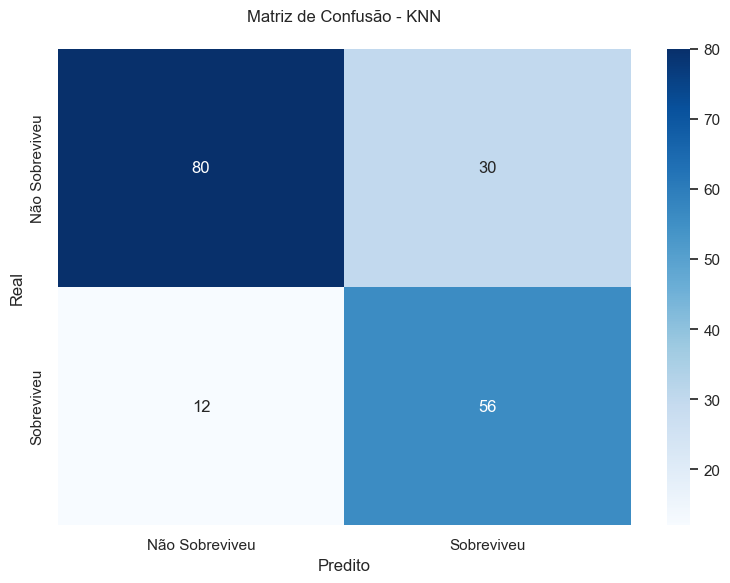


Métricas detalhadas - KNN:
Verdadeiros Negativos (TN): 80
Falsos Positivos (FP): 30
Falsos Negativos (FN): 12
Verdadeiros Positivos (TP): 56
Especificidade: 0.727
Sensibilidade: 0.824


In [48]:
print("Matriz de Confusão - KNN")
y_pred_knn = knn_bayes.predict(X_test)
plot_confusion_matrix(y_test, y_pred_knn, "KNN")


Matriz de Confusão - Random Forest


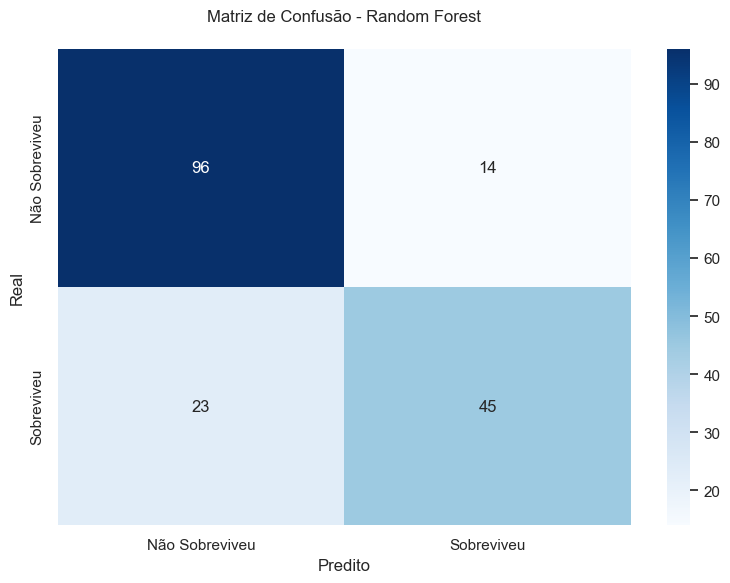


Métricas detalhadas - Random Forest:
Verdadeiros Negativos (TN): 96
Falsos Positivos (FP): 14
Falsos Negativos (FN): 23
Verdadeiros Positivos (TP): 45
Especificidade: 0.873
Sensibilidade: 0.662


In [49]:
print("\nMatriz de Confusão - Random Forest")
y_pred_rf = rf_bayes.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


Matriz de Confusão - XGBoost


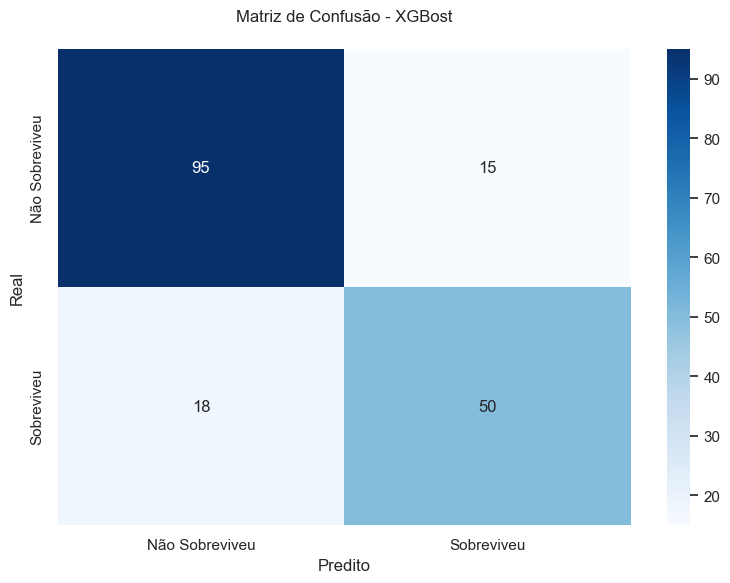


Métricas detalhadas - XGBost:
Verdadeiros Negativos (TN): 95
Falsos Positivos (FP): 15
Falsos Negativos (FN): 18
Verdadeiros Positivos (TP): 50
Especificidade: 0.864
Sensibilidade: 0.735


In [50]:
print("\nMatriz de Confusão - XGBoost")
y_pred_xgb = xgb_bayes.predict(X_test)
plot_confusion_matrix(y_test, y_pred_xgb, "XGBost")